In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

#### Задание 1
Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений   
по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти".   
Оцените ошибку модели из п.2 .   
Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


In [4]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

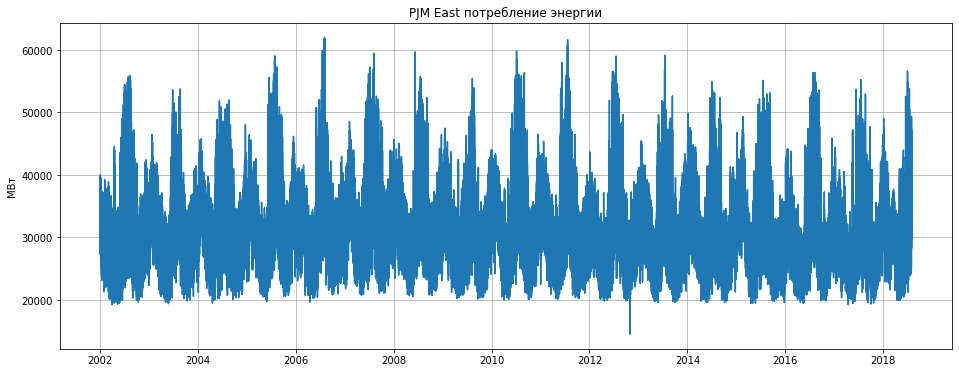

In [6]:
plt.figure(figsize =(16,6))
plt.plot(data.index, data['PJME_MW'])
plt.title('PJM East потребление энергии' )
plt.ylabel('МВт')
plt.show()

In [7]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

Проверим, как ведут себя первые разности (x(t) - x(t-1)).   
Если ряд таких разностей стационарен, то можно гарантировать стационарность ряда после удаления основной его части.

In [8]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]

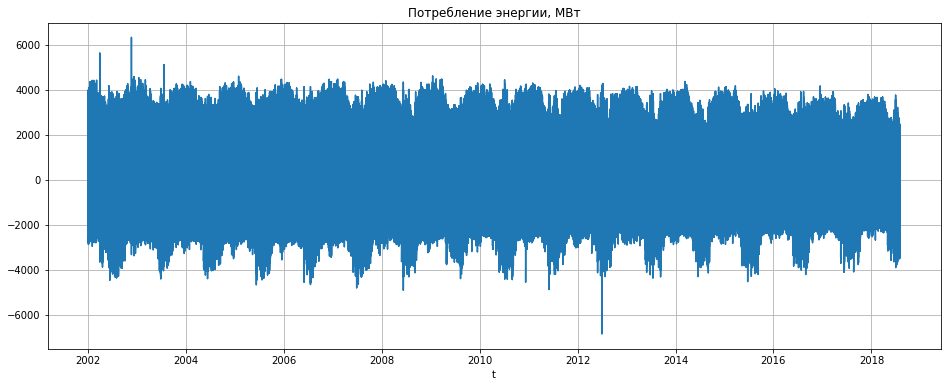

In [9]:
plt.figure(figsize =(16,6))
plt.plot(data.iloc[:-1].index, d_data)
plt.xlabel('t')
plt.title('Потребление энергии, МВт')
plt.show()

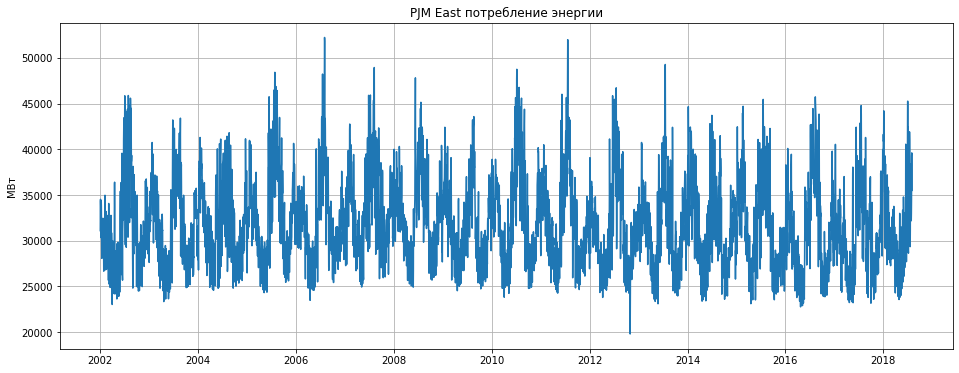

In [10]:
# Сделаем перерасчет ряда в дневные временные отрезки
data_d = data.resample('D').mean()
plt.figure(figsize =(16,6))
plt.plot(data_d.index, data_d['PJME_MW'])
plt.title('PJM East потребление энергии' )
plt.ylabel('МВт')
plt.show()

In [11]:
d_data = data_d['PJME_MW'].values[1:] - data_d['PJME_MW'].values[:-1]

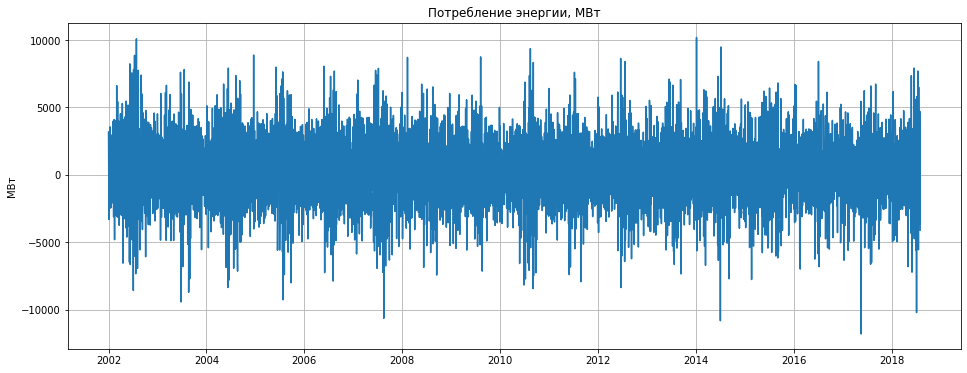

In [12]:
plt.figure(figsize =(16,6))
plt.plot(data_d.iloc[:-1].index, d_data)
plt.ylabel('МВт')
plt.title('Потребление энергии, МВт')
plt.show()

In [13]:
# Определим значение Расширеного теста Дики-Фуллера(ADF)
DF_data = sm.tsa.stattools.adfuller(data_d['PJME_MW'].values, regression='ctt')
DF_data

(-8.365362138569667,
 4.2829746152091345e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

In [15]:
# data_d = data.resample('D').mean()
d_data = data_d['PJME_MW'].values[1:] - data_d['PJME_MW'].values[:-1]
DF_data_d = sm.tsa.stattools.adfuller(d_data, regression='ctt')
print('Коэффициент ADF для 1-й разности потребления энергии: ', DF_data_d[1])

Коэффициент ADF для 1-й разности потребления энергии:  1.686181285965689e-21


Критерий Дики-Фуллера: p=0.000000


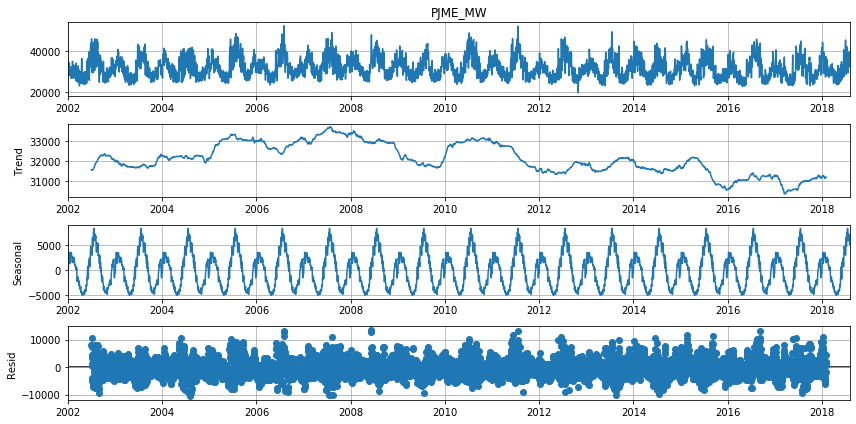

In [16]:
matplotlib.rcParams.update({'figure.figsize': (12,6)})
sm.tsa.seasonal_decompose(data_d['PJME_MW'], period=365).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data_d['PJME_MW'])[1])

In [17]:
# Экспоненциальное сглаживание
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [18]:
d_pe = pd.DataFrame(data = data_d[['PJME_MW']])
data_exp_1 = exponential_smoothing(data_d['PJME_MW'], 0.05)

Text(0.5, 1.0, 'PJM East потребление энергии')

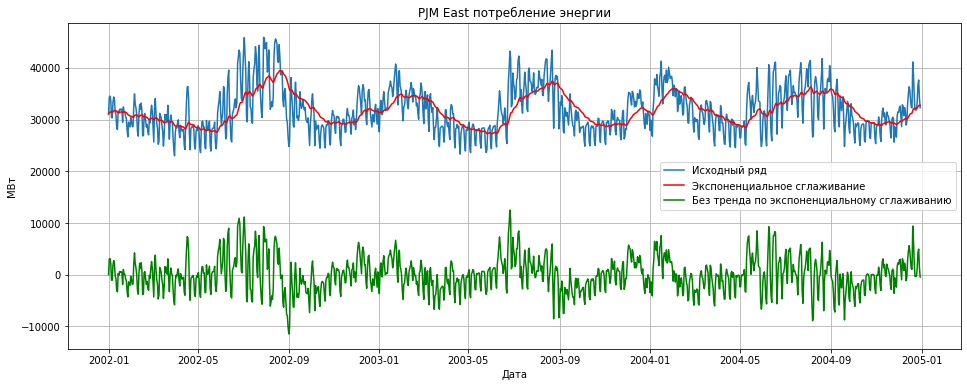

In [19]:
N = 1095
plt.figure(figsize=(16, 6))
plt.plot(d_pe.index[:N], d_pe['PJME_MW'].values[:N], label='Исходный ряд')
#plt.plot(d_pe['PJME_MW'].rolling(window=7).mean(), label="Скользящие средние");

plt.plot(d_pe.index[:N], data_exp_1[:N], color = 'red', label="Экспоненциальное сглаживание");
plt.plot(d_pe.index[:N], d_pe['PJME_MW'].values[:N] - data_exp_1[:N], color = 'green', 
         label="Без тренда по экспоненциальному сглаживанию");
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.legend()
plt.title('PJM East потребление энергии')

In [20]:
df = pd.DataFrame(data_exp_1, index=data_d.index)
# Добавим историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1] = df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2] = df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3] = df.iloc[:-3,0].values
df.fillna(0)
# Добавим сглаживание (3 вида)
df['exp_0_3'] = exponential_smoothing(df[0], 0.03)
df['exp_0_5'] = exponential_smoothing(df[0], 0.05)
df['exp_0_8'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0] - df.iloc[1:,0]
df.head(10)

C:\Users\samia\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,0,t,t1,t2,exp_0_3,exp_0_5,exp_0_8,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.0
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31085.510334,31088.691137,31093.462341,0.0
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31095.046546,31104.425782,31118.256077,0.0
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31107.764782,31125.153881,31150.314611,0.0
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31118.430677,31142.060918,31175.353012,0.0
2002-01-06,31406.309057,31463.294621,31518.987759,31403.384044,31127.067028,31155.273325,31193.829496,0.0
2002-01-07,31502.685270,31406.309057,31463.294621,31518.987759,31138.335576,31172.643922,31218.537958,0.0
2002-01-08,31645.696840,31502.685270,31406.309057,31463.294621,31153.556414,31196.296568,31252.710668,0.0
2002-01-09,31752.220331,31645.696840,31502.685270,31406.309057,31171.516331,31224.092756,31292.671441,0.0


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [22]:
# Разбивка на Тренировочные и тестовые данные
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [23]:
train_b, test_b = split_data_b(df, '2017-01-01')

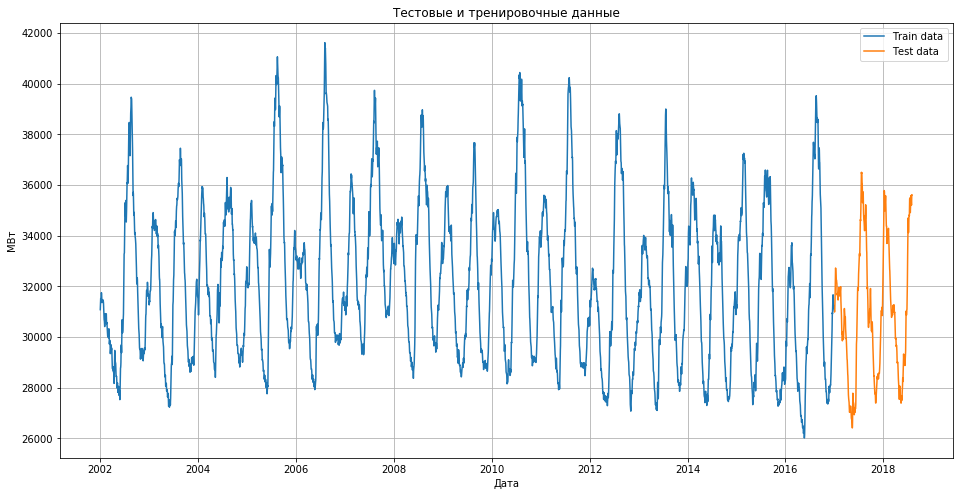

In [24]:
X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b  = test_b.iloc[:-1,:]
y_test_b  = test_b[df.columns[0]].values[1:]

plt.figure(figsize=(16,8))
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.plot(train_b.index.get_level_values('Date'),train_b[df.columns[0]], label='Train data' )
plt.plot( test_b.index.get_level_values('Date'), test_b[df.columns[0]], label='Test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
model_gb = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=100)
model_gb.fit(X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

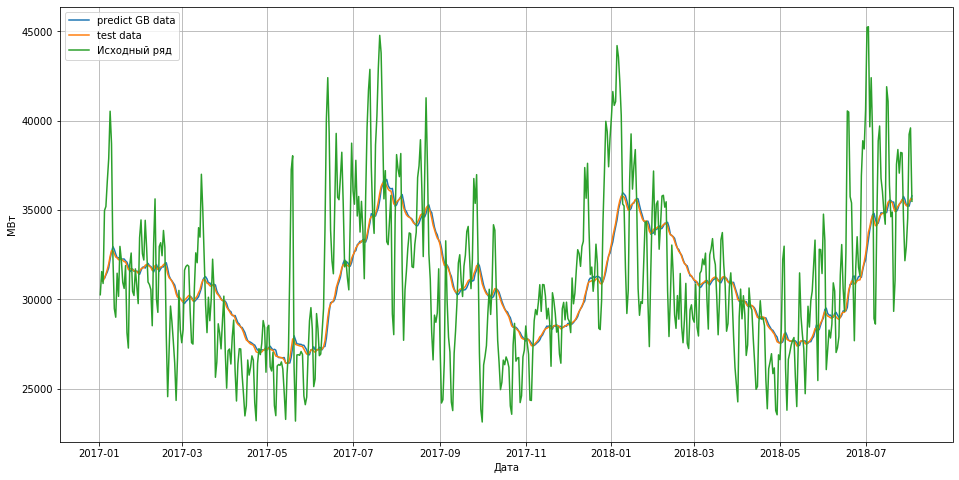

In [27]:
plt.figure(figsize=(16, 8))
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(d_pe.loc['2017-01-02':].index, d_pe.loc['2017-01-02':]['PJME_MW'], label='Исходный ряд')
plt.legend()
plt.show()

In [28]:
er_g1 = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)
print(f'Ошибка градиентного бустинга :  {er_g1:.4f} %')

Ошибка градиентного бустинга :  0.3891 %


In [29]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b  = test_b.iloc[:-h,:]
y_test_b  = test_b[df.columns[0]].values[h:]

model_gb.fit(X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

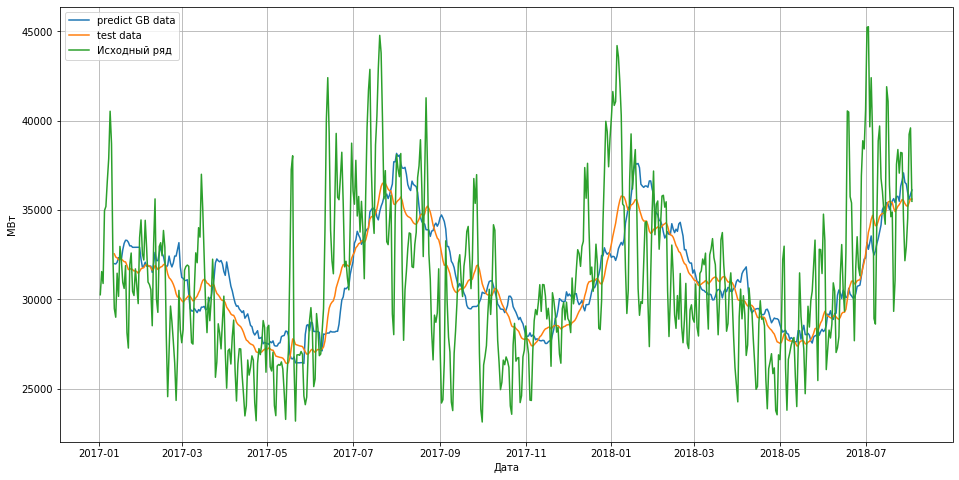

In [30]:
plt.figure(figsize=(16, 8))
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(d_pe.loc['2017-01-02':].index, d_pe.loc['2017-01-02':]['PJME_MW'], label='Исходный ряд')
plt.legend()
plt.show()

In [31]:
er_g10 = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)
print(f'Ошибка градиентного бустинга :  {er_g10:.4f} %')

Ошибка градиентного бустинга :  2.9195 %


__Задание__   
Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [32]:
print(f'Ошибка для h=1 :  {er_g1:.4f} %')
print(f'Ошибка для h=10:  {er_g10:.4f} %')

Ошибка для h=1 :  0.3891 %
Ошибка для h=10:  2.9195 %


С увеличением значения h - ошибка прогноза растет.

__Задание__   

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и    аргументируйте свой ответ (одна строка):   
а) _Изменение температуры за окном_ :).   
   Ряд не стационарный, сезонный годовой цикл, в последние годы - тренд повышения температуры   
   
б) _Количество денег, которые тратят покупатели в интернет магазине._   
   Ряд не стационарный, зависит от праздничных дней, тренд на увеличение трат по мере охвата всё больших пользователей.   
   Зависит от  страны, выхода новых продуктов, рекламных расходов и проч.   
   
в) _Вес растущего котенка._   
   Предполагаю, что ряд не стационарный, вес увеличивается до определенного возраста,   
   прирост (скорость изменения веса) со временем уменьшается.
   
г) _Прирост объема деревьев в лесу от времени_   
   Если лес уже растёт достаточно давно - то прирост объёма может быть стационарным, цикличным от времени года.   
   Если лес новый - ряд не стационарный, большой рост новых деревьев (по мере завоевания свободного места), затем стабилизация.    Ряд также цикличен и зависит от времени года (для средних широт).